#### Introduction
The Loan eligibility/prediction data set is a popular data set used in machine learning and data analysis. The dataset contains information about loan applicants and whether they were approved or not for a loan.
The data set include the following variable
1. Loan ID: Unique identifier for each loan
2. Gender: Gender of the applicant (Male/Female)
3. Married: Marital status of the applicant (Yes/No)
4. Dependents: Number of dependents the applicant has
5. Education: Education level of the applicant (Graduate/Not Graduate)
6. Self Employed: Whether the applicant is self-employed or not (Yes/No)
7. Applicant Income: Income of the applicant
8. Co-applicant Income: Income of the co-applicant
9.  Loan Amount: Loan amount applied for
10. Loan Amount Term: Term of the loan in months
11. Credit History: Credit history of the applicant (1=Good, 0=Bad)
12. Property Area: Location of the property (Rural/Semiurban/Urban)
13. Loan Status: Whether the loan was approved or not (Y=Yes, N=No)

#### Aims and Objectives
1. To build a predictive model to determine whether a loan applicantion will be approve or not
2. To build a model that best predict our target variable and get the accuracy of the model

>The target variable is "Loan Status", which is a binary variable indicating whether the loan was approved or not. The other variables can be used as predictors in the model.

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [286]:
loan_df=pd.read_csv('loan_data_set.csv')
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [287]:
loan_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [288]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [289]:
loan_df.isna().sum()/len(loan_df)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [290]:
loan_df.drop(columns=['Loan_ID'], inplace=True)

In [291]:
loan_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [292]:
loan_df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [293]:
loan_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [294]:
for col in loan_df.columns:
    if col is loan_df['Self_Employed']:
        mode=loan_df[col].mode()
        loan_df[col]=loan_df[col].fillna(mode)
    elif col is loan_df['Credit_History']:
        mean=loan_df[col].mean()
        loan_df[col]=loan_df[col].fillna(mean)
    else:
        loan_df.dropna(inplace=True)

In [295]:
loan_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [296]:
#let map the loan status columns with 1 and 0
loan_df['Loan_Status']=loan_df['Loan_Status'].map({'N':0,'Y':1})

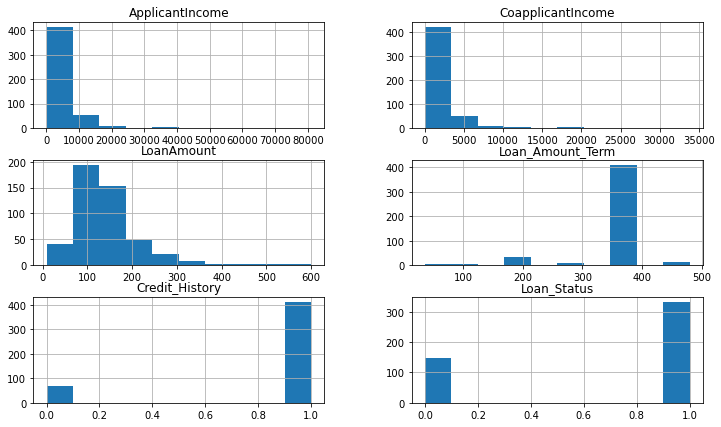

In [297]:
loan_df.hist(figsize=(12,7));

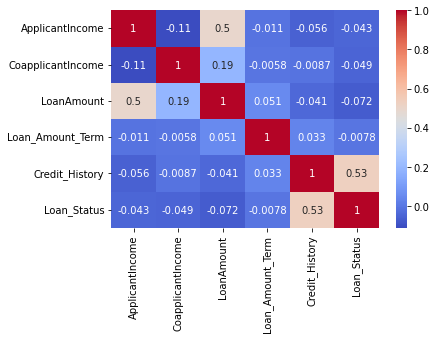

In [298]:
sb.heatmap(loan_df.corr(), cmap='coolwarm', annot=True);

#### Observation
Credit History play a vital role in detecting the loan status

In [299]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167,0.691667
std,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.462287
min,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000,1.000000


In [300]:
#let select num_col
num_col=loan_df.select_dtypes('number').columns
num_col

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

In [301]:
loan1=loan_df.copy()
loan_label=loan_df['Loan_Status']
loan_df.drop('Loan_Status', axis=1, inplace=True)

In [302]:
loan_df.skew().sort_values(ascending=False)

ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Credit_History      -2.013253
Loan_Amount_Term    -2.333710
dtype: float64

In [303]:
skew_col=['ApplicantIncome','CoapplicantIncome','LoanAmount']
number_col=list(loan_df.select_dtypes('number').columns)

In [304]:
string_col=list(loan_df.select_dtypes('object').columns)

In [310]:
# Check for outliers columns
def outliers_check():
    col_store=[]
    
    for col in loan_df.select_dtypes('number'):
        q1=loan_df[col].quantile(.25)
        q3=loan_df[col].quantile(.75)
        
        iqr=q3-q1
        lower_out=(loan_df[col] < (q1-(1.5*iqr))).sum()
        upper_out=(loan_df[col] > (q3 + (1.5 *iqr))).sum()
        
        if lower_out > 0 or upper_out >0:
            col_store.append(col)
    return col_store
outlier_col=outliers_check()
list(outlier_col)

['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

####  EDA Summary Report
While performing the exploratory  data analysis, 'ApplicantIncome','CoapplicantIncome' and 'LoanAmount' columns are mostly skewed which is later nomalized with np.log function, The ouliers columns include 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', Loan amount term columns contains more outliers compare to the other three columns
While checking for independent variable that mostly contribute to outcome of the terget variable credit history column play a vital role to determine whether a customer can access a loan or not

In [306]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [307]:
loan_df[skew_col]=np.log(loan_df[skew_col]+1)
loan_df[number_col]=scaler.fit_transform(loan_df[number_col])

In [308]:
loan_df.shape

(480, 11)

In [206]:
loan_df=pd.get_dummies(loan_df, string_col)

In [207]:
# loan_df[string_col]=scaler.fit_transform(loan_df[string_col])

In [208]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [209]:
X_train, X_test, Y_train, Y_test=train_test_split(loan_df,loan_label,random_state=True,shuffle=True,test_size=.2)

In [210]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((384, 20), (96, 20), (384,), (96,))

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [212]:
Models={'Logistic_regression':LogisticRegression(),
      'Decesion_tree_Classifier':DecisionTreeClassifier(),
      'Random forest classifier': RandomForestClassifier(),
      'SVC':SVC(),
       'XGB':XGBClassifier()
       
       }

In [213]:
TP=loan_label.sum()
FP=loan_label.shape[0]-TP
TN=0
FN=0
precision= TP/ TP+FP

Recall = TP / TP + FN

Accuracy = (TP + TN)/TP + FN + TN + FP

In [214]:
def fit_score(models,X_train,X_test,Y_train,Y_test):
    
    """
    fit and evaluate each ML models
    Model=dictionary
    X_train: training data without label
    X_test: Testing data without label
    Y_train: training data with label
    Y_test: testing data with label
    """
    # create a random seed 
    np.random.seed(50)
    
    # create an empty dic
    model_score={}
    test_score={}
    
    for name,model in models.items():
        #fit model
        model.fit(X_train,Y_train)
        predict_train=model.predict(X_train)
        predict_test=model.predict(X_test)
        #evaluating the score, 
        model_score[name]=accuracy_score(predict_train,Y_train)
        test_score[name]=accuracy_score(predict_test,Y_test)
    print(f'model accuracy score on train data is {model_score}, \n model accuracy test data is {test_score}') 

In [215]:
scores=fit_score(models=Models,
                 X_train=X_train,
                 Y_train=Y_train,
                 X_test=X_test,
                 Y_test=Y_test)

model accuracy score on train data is {'Logistic_regression': 0.8229166666666666, 'Decesion_tree_Classifier': 1.0, 'Random forest classifier': 1.0, 'SVC': 0.8463541666666666, 'XGB': 1.0}, 
 model accuracy test data is {'Logistic_regression': 0.75, 'Decesion_tree_Classifier': 0.6875, 'Random forest classifier': 0.71875, 'SVC': 0.7395833333333334, 'XGB': 0.6875}


#### Observation
The Model that is effectively training on the test data is Logistic Regression with training accuracy of 82% and 75% test accuracy. Random forest and Decision tree seems to be overfitting with model train of 100% and test accuracy of 69% and 71% repectively

Let use the LogisticRegression to find other metrics

In [216]:
log_reg_model=LogisticRegression()

In [217]:
log_reg_model.fit(X_train,Y_train)

LogisticRegression()

In [218]:
l_train_pre=log_reg_model.predict(X_train)

In [219]:
accuracy_score(l_train_pre,Y_train)

0.8229166666666666

In [220]:
l_test=log_reg_model.predict(X_test)

In [221]:
accuracy_score(l_test,Y_test)

0.75

In [222]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
cross_val_score(log_reg_model, X_train, Y_train, cv=3, scoring='accuracy')

array([0.8359375, 0.8359375, 0.78125  ])

In [223]:
predict_test=cross_val_predict(log_reg_model,X_test,Y_test,cv=3)

In [224]:
# check for the precision score
precision_score(predict_test,Y_test)

0.9047619047619048

In [225]:
from sklearn.metrics import recall_score, confusion_matrix

In [226]:
recall_score(predict_test,Y_test)

0.7307692307692307

In [227]:
f1_score(predict_test,Y_test)

0.8085106382978723

In [228]:
confusion_matrix(predict_test,Y_test)

array([[12,  6],
       [21, 57]], dtype=int64)

#### Observation
Just as it suppose, For greater precision score the test tend to have  lower recall score, the data predicted with a precision scoreof 0.90, and a recall score of 0.73.

f1_score= 2*((precision * recall)/(precision + recall)) which is 0.81

 #### Use GridSearchCV to tune your model

In [229]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [230]:
#logistics regression parameter
LogisticRegression?

In [250]:
parameter={'penalty':['l2'],
          'C': [1,3,7]#np.logspace(1,3,7),
          ,'solver':['lbfgs','newton-cg','liblinear'],
          'max_iter':[100]}

In [251]:
grid_model=GridSearchCV(log_reg_model, param_grid=parameter,scoring='accuracy',cv=3)

In [252]:
grid_model.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [1, 3, 7], 'max_iter': [100], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear']},
             scoring='accuracy')

In [253]:
final_model=grid_model.best_estimator_
cross_val_score(final_model,X_test,Y_test,scoring='accuracy')

array([0.65      , 0.73684211, 0.73684211, 0.73684211, 0.84210526])

In [254]:
pred=cross_val_predict(final_model,X_test,Y_test)

In [255]:
confusion_matrix(pred,Y_test)

array([[13,  5],
       [20, 58]], dtype=int64)

In [256]:
print('Tunned Hyperparameter:', grid_model.best_params_)
print('Accuracy:', grid_model.best_score_)

Tunned Hyperparameter: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8177083333333334


In [259]:
log=LogisticRegression(C=1,penalty='l2',solver='lbfgs')
log.fit(X_train,Y_train)
y_pred=log.predict(X_test)
print('accuracy score after tunning:', accuracy_score(y_pred,Y_test))

accuracy score after tunning: 0.75


#### Conclussion:
1. The best model that can be used to predict if customers is to be given loan or not is Logistic Regression model, with training accuracy of 82% and test accuracy of 75%
2. The model has precision score of 0.90, recall score of 0.73, f1 score of 0.81
3. After tunning the model there is no much difference in the train accuracy  while the test accuracy remain same
4. Credit history play a vital role to predict if a customer is eligible or not